# Лабораторная работа №6
## Выполнил: Пелагеев Даниил Иванович Б9122-01.03.02мкт
### ...

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = 'datasets/seeds_dataset.txt'
columns = ['Area', 'Perimeter', 'Compactness', 'Length of kernel', 'Width of kernel', 'Asymmetry coefficient',
           'Length of kernel groove', 'Class']  # Добавили названия столбцам 

df = pd.read_csv(data, sep='\t', names=columns)
print('Размерность датасета:', df.shape, end='\n\n')
df.head(10)

Размерность датасета: (210, 8)



,Area,Perimeter,Compactness,Length of kernel,Width of kernel,Asymmetry coefficient,Length of kernel groove,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


In [3]:
X = df.drop('Class', axis=1)  # Признаки
y = df['Class']  # Целевая переменная

Разделяем данные на матрицу признаков X (все столбцы, кроме `Class`) и целевую переменную y (столбец `Class`), которую мы будем предсказывать.

In [4]:
df.isnull().sum().sum()

np.int64(0)

Пропусков в нашем датасете нет

In [5]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

Применяем `LabelEncoder` для преобразования целевой переменной в числовую форму. В данном случае `Class` уже представлен числами, поэтому это преобразование не обязательно, но его можно использовать, если классы представлены текстовыми значениями.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Разделяем данные на тренировочную и тестовую выборки в соотношении 80% к 20%. Параметр `random_state=42` гарантирует, что при каждом запуске код будет использовать одинаковое разделение данных для воспроизводимости.

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Создаем объект модели линейной регрессии и обучаем её на тренировочной выборке (`X_train`, `y_train`).

In [8]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  # Округляем предсказанные значения до ближайших целых чисел для сравнения с классами

Выполняем предсказания на тестовой выборке (`X_test`). Округляем предсказания до ближайших целых чисел, чтобы привести их к тем же значениям, что и классы (например, 1, 2, 3).

In [9]:
# 8. Оценка точности и вывод результатов
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[ 9  2  0]
 [ 1 13  0]
 [ 0  8  9]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.57      0.93      0.70        14
           2       1.00      0.53      0.69        17

    accuracy                           0.74        42
   macro avg       0.82      0.76      0.75        42
weighted avg       0.83      0.74      0.74        42



Выводим матрицу ошибок (`confusion_matrix`) и отчет о классификации (`classification_report`), которые показывают, насколько точно модель предсказывает классы на тестовой выборке.

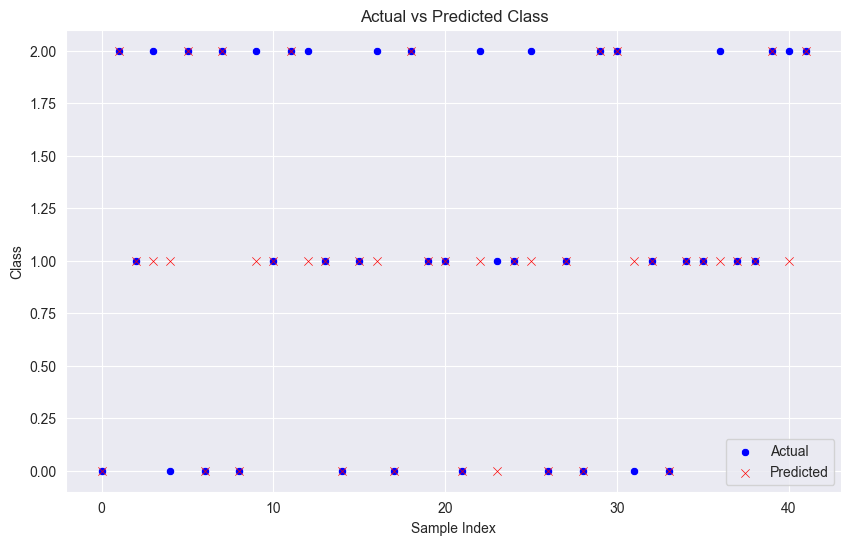

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(y_test)), y=y_test, label="Actual", marker='o', color='b')
sns.scatterplot(x=range(len(y_pred)), y=y_pred, label="Predicted", marker='x', color='r')
plt.xlabel("Sample Index")
plt.ylabel("Class")
plt.title("Actual vs Predicted Class")
plt.legend()
plt.show()